In [1]:

# import dependancies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import openweathermapy.core as owm
from citipy import citipy
import requests
from datetime import datetime


In [2]:
# owm API key
api_key = "567dd8c639b39c8fa1c06b23fb093931"

In [3]:
# Determine how many cities we will need to get 500 cities documented
# Create a list to track these cities
n = 500
cities = []

for x in range(n):
    lat = np.random.uniform(-90, 90)
    lng = np.random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lng)
    
    # Make sure the randomnly selected city is not repeated
    # if so, reselect the lat, lng until we get one that hasn' been sampled
    while city.city_name in cities:
        lat = np.random.uniform(-90, 90)
        lng = np.random.uniform(-180, 180)
        city = citipy.nearest_city(lat, lng)
        
    # Create our list from this data
    cities.append(city.city_name)


In [4]:
# Weather check and API call
# Create URL and define imperial units
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# build url query
query = f"{url}&q="


In [5]:
#Create extracted objects for temp, humidity, cloudiness and wind speed

latitude = []
longitude = []
temperature = []
humidity = []
wind_speed = []
cloudiness = []
dates = []


for x in range(len(cities[:7])):
    responce = requests.get(f"{query}{cities[x]}").json()
    
    # Set values to NaN for cities that dont generate data in owm
    try:
        latitude.append(responce['coord']['lat'])
        longitude.append(responce['coord']['lon'])
        temperature.append(responce['main']['temp_max'])
        humidity.append(responce['main']['humidity'])
        wind_speed.append(responce['wind']['speed'])
        cloudiness.append(responce['clouds']['all'])
        dates.append(responce['dt'])
    except KeyError:
        latitude.append(np.nan)
        longitude.append(np.nan)
        temperature.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        cloudiness.append(np.nan)
        dates.append(np.nan)
        
    # Print cities & query
    print(f"Processing record{x + 1} | {cities[x]}")
    print(f"{query}{cities[x]}")
    
print("--------------------------------------------")
print("--------------------------------------------")

# Build the DataFrame
weather_df = pd.DataFrame({"City": cities, 
                          "Latitude": latitude, 
                          "Longitude": longitude, 
                          "Max Temp": temperature, 
                          "Humidity": humidity, 
                          "Wind Speed": wind_speed, 
                          "Cloudiness": cloudiness, 
                          "Dates": dates
                          })
        

Processing record1 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=567dd8c639b39c8fa1c06b23fb093931&q=sao joao da barra
Processing record2 | dorado
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=567dd8c639b39c8fa1c06b23fb093931&q=dorado
Processing record3 | malanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=567dd8c639b39c8fa1c06b23fb093931&q=malanje
Processing record4 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=567dd8c639b39c8fa1c06b23fb093931&q=mount gambier
Processing record5 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=567dd8c639b39c8fa1c06b23fb093931&q=la ronge
Processing record6 | elizabeth city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=567dd8c639b39c8fa1c06b23fb093931&q=elizabeth city
Processing record7 | pevek
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=567dd8c639b39c8fa1c

ValueError: arrays must all be same length

In [77]:
temperature

[nan, nan, nan, nan, nan, nan, nan]

In [69]:
# Remove NAN value cities
weather_df = weather_df.dropna(how='any')
print(f"The data frame contains{len(weather_df['City'])} unique cities.")

The data frame contains0 unique cities.


In [75]:
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Wind Speed,Cloudiness,Date,Country


In [72]:
dataframe tbody tr th {
    vertical-align: top;}

dataframe thead th {
    text-align: right;}


SyntaxError: invalid syntax (<ipython-input-72-66cfc81c6b76>, line 1)

KeyError: 'the label [0] is not in the [index]'

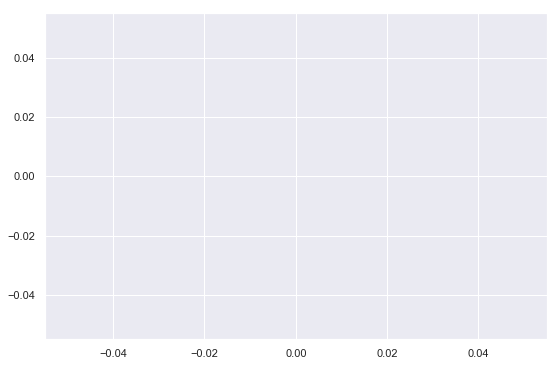

In [62]:
# Max Temp
# use seaborn to set aesthetic
sns.set()

# increase figure size
plt.figure(figsize=(9,6))

# Plot Lat V Max Temp
plt.scatter(x = weather_df['Latitude'], y = weather_df['Max Temp'], 
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# labels & title w date & time extraction
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Tempature ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Mdify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Max Temp']) - 10, max(weather_df['Max Temp']) + 10)
plt.show()


In [ ]:
# Humidity
# use seaborn to set aesthetics
sns.set()

# Increase figure size
plt.figure(figsize=(9,6))

# Plot the lat V humidity
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'], 
           linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# labels & title w date & time extraction
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Humidity ({weather_df})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
           
# Modify ticks
plt.xlim(-80,100)
plt.ylim(-10,110)
plt.show()

KeyError: 'the label [0] is not in the [index]'

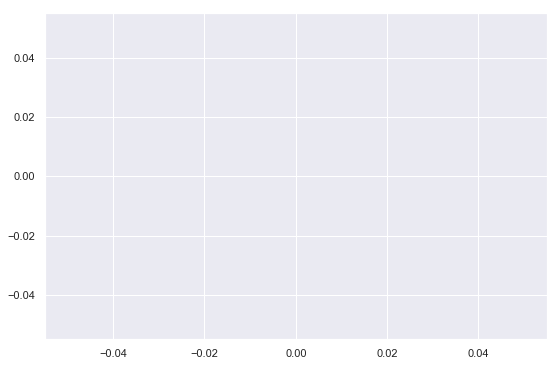

In [50]:
# Wind Speed
# use seaborn to set aesthetics
sns.set()

# Increase figure size
plt.figure(figsize=(9,6))

# Plot the lat V wind speed
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'], 
                linewidth = 0.75, edgecolors = 'black', color = 'blue', s=35)

# labels & title w date & time extraction
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Wind Speed ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(-5, max(weather_df['Wind Speed'])+5)
plt.show()


In [51]:
# Cloudiness
# use seaborn to set aesthetics
sns.set()

# Increase figure size
plt.figure(figsize=(9,6))

# Plot the lat V Cloudiness
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'], 
           linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# labels & title w date & time extraction
weather_dt = datetime.fromtimestamp(weather_df.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Cloudiness ({weather_dt})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness" (%)")
           
#Modify ticks
plt.xlim(-80,100)
plt.ylim(-10,110)
plt.show()


SyntaxError: invalid syntax (<ipython-input-51-e76321ef4138>, line 16)